# Shark Attack - James Lawlor, C22388703

#### Convert to an appropriate colourspace to exaggerate the fish/sea difference
#### Enhance the images to increase contrast and definition
#### Enhance the fish portion of the image
#### Automatically crop and rotate the image to contain only the fish
#### The final image should be an enhanced image of the fish with a clean minimal background

##### Step 1: Import the image, convert to RGB.
##### Step 2: Use a kernel to sharpen the image.
##### Step 3: Convert to HSV, and take only the V, for value.
##### Step 4: Use "cv2.fastNlMeansDenoising()" to denoise the image. [3]
##### Step 5: Use kernels to get four gradients: 2 vertical, from top and bottom, and 2 horizontal, from left and right.
##### Step 6: Add together the four gradient image to get 1 image that shows the outline in the image.
##### Step 7: Set all pixels above or below a certain value to either black or white, to get a binary image. The outline should be white. [1]
##### Step 8: Create a new black image, then use "cv2.findContours()".
##### Step 9: Iterating through the list of contours found, look for ones with an area above a certain threshold. [2]
##### Step 10: Draw only these contours that are large enough (i.e. our outline).
##### Step 11: Passing the "cv2.drawContours()" method "-1" for line thickness will fill in the outline when it draws, giving us our mask.
##### Step 12: Return to the original image. Convert to YUV, use "cv2.equalizeHist()" on the Y channel to boost contrast, then use "cv2.fastNlMeansDenoisingColored()" to denoise. [3]
##### Step 13: Take a copy of the mask to use as the alpha channel later, then convert from gray to RGB, and use "cv2.bitwise_and()" with our mask and the original image. [4]
##### Step 14: Find the highest, lowest, leftmost, and rightmost pixels where the colour isn't black. These are our borders, and we crop to these. Crop the alpha to the same dimensions.
##### Step 15: Convert the image to RGBA, and insert the previously captured alpha as the alpha channel. This makes everything but the fish transparent.
##### Step 16: Save as PNG.

<br><br>

##### [1] steve8918, “Adobe Photoshop-style posterization and OpenCV,” Stack Overflow, Jun. 16, 2012. https://stackoverflow.com/questions/11064454/adobe-photoshop-style-posterization-and-opencv
##### [2] chostDevil, “How to detect region of large # of white pixels using OpenCV?,” Stack Overflow, Apr. 21, 2012. https://stackoverflow.com/questions/10262600/how-to-detect-region-of-large-of-white-pixels-using-opencv
##### [3] “OpenCV: Image Denoising,” docs.opencv.org. https://docs.opencv.org/4.x/d5/d69/tutorial_py_non_local_means.html
##### [4] GeeksforGeeks, “Bitwise Operations on Binary Images in OpenCV2,” GeeksforGeeks, Feb. 25, 2019. https://www.geeksforgeeks.org/python/arithmetic-operations-on-images-using-opencv-set-2-bitwise-operations-on-binary-images/ (accessed Oct. 22, 2025).

‌

‌

‌





In [106]:
import cv2 as cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as image

I = cv2.imread("Shark 1.PNG")
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

Original = I.copy()

k = np.array([[-2,-4,-2], [-4,25,-4], [-2,-4,-2]], dtype=float)

sharp = cv2.filter2D(I,ddepth=-1,kernel=k)

In [107]:
iHSV = cv2.cvtColor(I, cv2.COLOR_RGB2HSV)

v = iHSV[:,:,2]

dst = cv2.fastNlMeansDenoising(v,None,3,9,35)

In [108]:
k = np.array([[-5,-10,-5], [0,0,0], [5,10,5]], dtype=float)

bottom = cv2.filter2D(dst,ddepth=-1,kernel=k)

In [109]:
k = np.array([[5,10,5], [0,0,0], [-5,-10,-5]], dtype=float)

top = cv2.filter2D(dst,ddepth=-1,kernel=k)

In [110]:
k = np.array([[-5,0,5], [-10,0,10], [-5,0,5]], dtype=float)

right = cv2.filter2D(dst,ddepth=-1,kernel=k)

In [111]:
k = np.array([[5,0,-5], [10,0,-10], [5,0,-5]], dtype=float)

left = cv2.filter2D(dst,ddepth=-1,kernel=k)

In [112]:
vertical = cv2.add(top, bottom)

In [113]:
horizontal = cv2.add(left, right)

In [114]:
edges = cv2.add(vertical, horizontal)

In [115]:
edges[edges >= 45] = 255
edges[edges < 45] = 0

In [116]:
mask = np.full(edges.shape, 0, np.uint8)

contours, hierarchy = cv2.findContours(edges, mode = cv2.RETR_LIST, method = cv2.CHAIN_APPROX_SIMPLE)
for c in contours:
    if 500<cv2.contourArea(c):
        cv2.drawContours(mask,[c],0,255,-1)

In [117]:
iYUV = cv2.cvtColor(Original, cv2.COLOR_RGB2YUV)

iYUV[:,:,0] = cv2.equalizeHist(iYUV[:,:,0])

iYUV = cv2.cvtColor(iYUV, cv2.COLOR_YUV2RGB)

denoisedYUV = cv2.fastNlMeansDenoisingColored(iYUV,None,10,10,7,21)

In [118]:
alpha = mask.copy()

mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)

maskedImg = cv2.bitwise_and(mask, denoisedYUV)

In [119]:
right = max(np.where(maskedImg > 100)[1])
left = min(np.where(maskedImg > 100)[1])
bottom = max(np.where(maskedImg > 100)[0])
top = min(np.where(maskedImg > 100)[0])

croppedImage = maskedImg[top:bottom, left:right]
croppedAlpha = alpha[top:bottom, left:right]

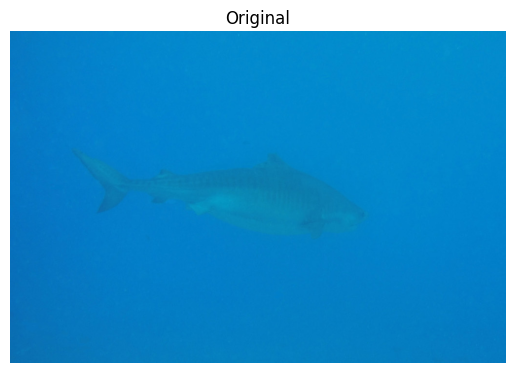

True

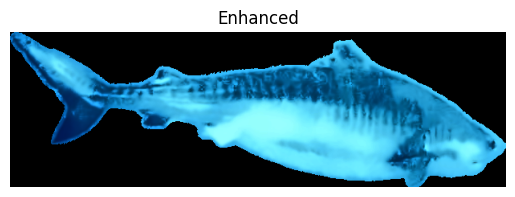

In [120]:
plt.imshow(Original)
plt.title("Original")
plt.axis('off')

plt.show()

plt.imshow(croppedImage)
plt.title("Enhanced")
plt.axis('off')

result = cv2.cvtColor(croppedImage, cv2.COLOR_RGB2BGRA)

result[:,:,3] = croppedAlpha

cv2.imwrite("fishImage.png", result)

#### As we can see, the fish is completely isolated from the background, cropped to just the fish, and the image has been sharpened, contrasted, and denoised to ensure the detail is maximally visible.